In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, roc_auc_score, RocCurveDisplay)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [41]:
#@title Load Dataset
df = pd.read_csv("dataset.csv")

In [42]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target,Unnamed: 25,Unnamed: 26
0,1.0,17.0,5.0,171.0,1.0,1.0,122.0,1.0,19.0,12.0,...,1.0,0.0,NaN,0.0,10.8,1.4,1.74,Dropout,NaN,NaN
1,1.0,15.0,1.0,9254.0,1.0,1.0,160.0,1.0,1.0,3.0,...,1.0,0.0,19.0,0.0,13.9,-0.3,0.79,Graduate,NaN,NaN
2,1.0,NaN,5.0,9070.0,1.0,1.0,122.0,NaN,37.0,37.0,...,1.0,NaN,19.0,0.0,10.8,1.4,1.74,Dropout,NaN,NaN
3,1.0,17.0,2.0,9773.0,1.0,1.0,122.0,1.0,38.0,37.0,...,NaN,0.0,20.0,0.0,9.4,-0.8,-3.12,Graduate,NaN,NaN
4,2.0,39.0,1.0,8014.0,0.0,1.0,100.0,1.0,37.0,NaN,...,0.0,0.0,NaN,0.0,13.9,-0.3,0.79,Graduate,NaN,NaN


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Marital status                  4001 non-null   float64
 1   Application mode                3941 non-null   float64
 2   Application order               3998 non-null   float64
 3   Course                          3959 non-null   float64
 4   Daytime/evening attendance	     3984 non-null   float64
 5   Previous qualification          3990 non-null   float64
 6   Previous qualification (grade)  3952 non-null   float64
 7   Nacionality                     3978 non-null   float64
 8   Mother's qualification          4010 non-null   float64
 9   Father's qualification          3974 non-null   float64
 10  Mother's occupation             3988 non-null   float64
 11  Father's occupation             3999 non-null   float64
 12  Admission grade                 39

In [44]:
df.drop(columns=['Unnamed: 25','Unnamed: 26'], inplace=True)

In [45]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,1.0,17.0,5.0,171.0,1.0,1.0,122.0,1.0,19.0,12.0,...,0.0,1.0,1.0,0.0,NaN,0.0,10.8,1.4,1.74,Dropout
1,1.0,15.0,1.0,9254.0,1.0,1.0,160.0,1.0,1.0,3.0,...,0.0,0.0,1.0,0.0,19.0,0.0,13.9,-0.3,0.79,Graduate
2,1.0,NaN,5.0,9070.0,1.0,1.0,122.0,NaN,37.0,37.0,...,0.0,0.0,1.0,NaN,19.0,0.0,10.8,1.4,1.74,Dropout
3,1.0,17.0,2.0,9773.0,1.0,1.0,122.0,1.0,38.0,37.0,...,0.0,1.0,NaN,0.0,20.0,0.0,9.4,-0.8,-3.12,Graduate
4,2.0,39.0,1.0,8014.0,0.0,1.0,100.0,1.0,37.0,NaN,...,0.0,1.0,0.0,0.0,NaN,0.0,13.9,-0.3,0.79,Graduate


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Marital status                  4001 non-null   float64
 1   Application mode                3941 non-null   float64
 2   Application order               3998 non-null   float64
 3   Course                          3959 non-null   float64
 4   Daytime/evening attendance	     3984 non-null   float64
 5   Previous qualification          3990 non-null   float64
 6   Previous qualification (grade)  3952 non-null   float64
 7   Nacionality                     3978 non-null   float64
 8   Mother's qualification          4010 non-null   float64
 9   Father's qualification          3974 non-null   float64
 10  Mother's occupation             3988 non-null   float64
 11  Father's occupation             3999 non-null   float64
 12  Admission grade                 39

c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


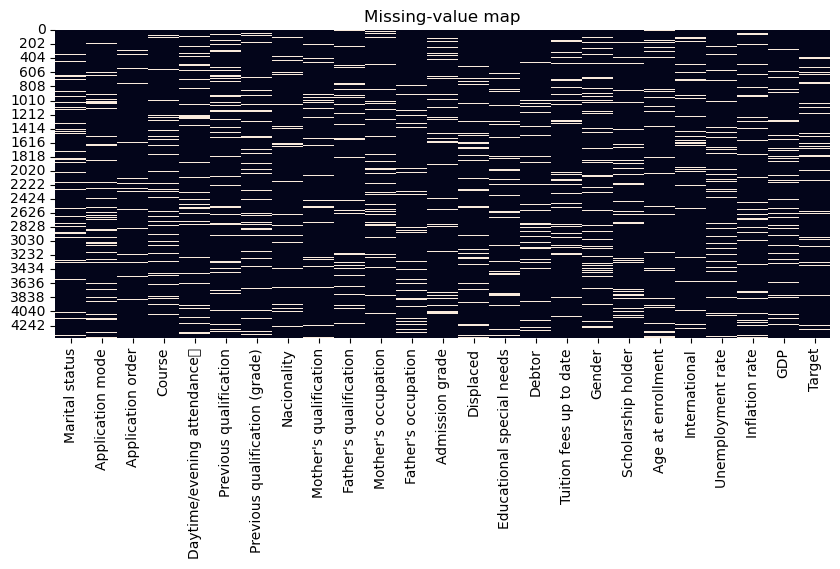

In [46]:
import seaborn as sns
plt.figure(figsize=(10,4))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing‑value map"); plt.show()


# Plots

c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


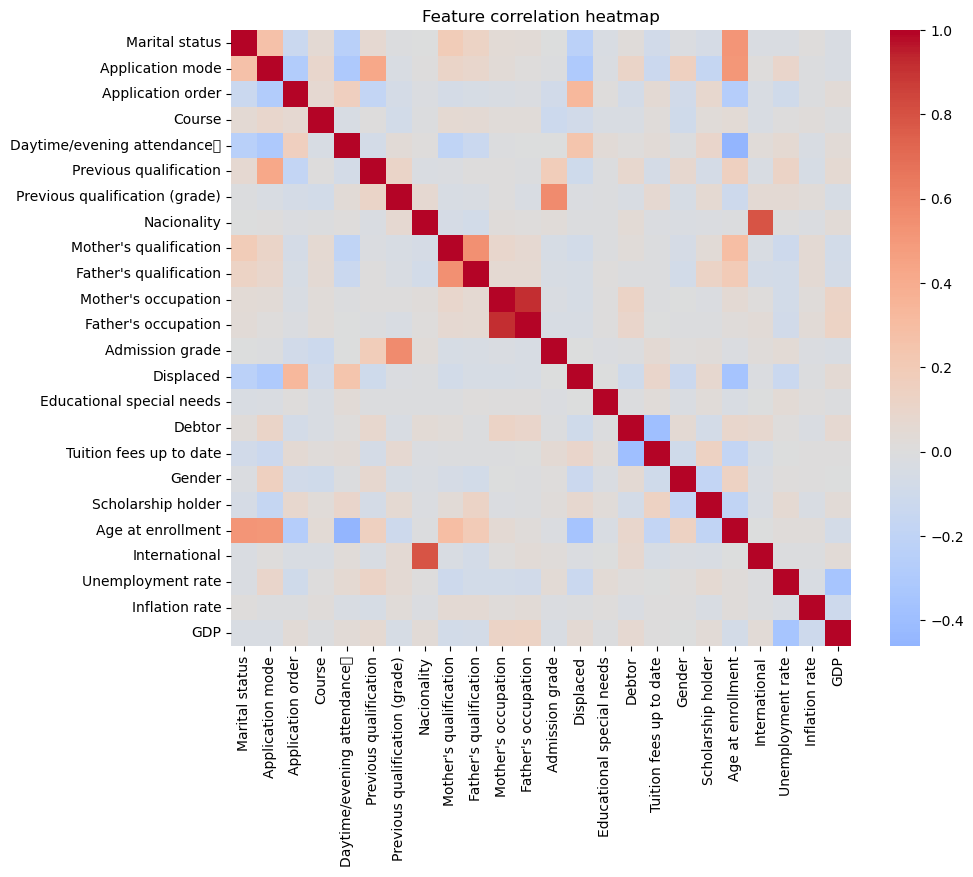

In [11]:
# Correlation heatmap (numerics only)
plt.figure(figsize=(10,8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature correlation heatmap")
plt.show()

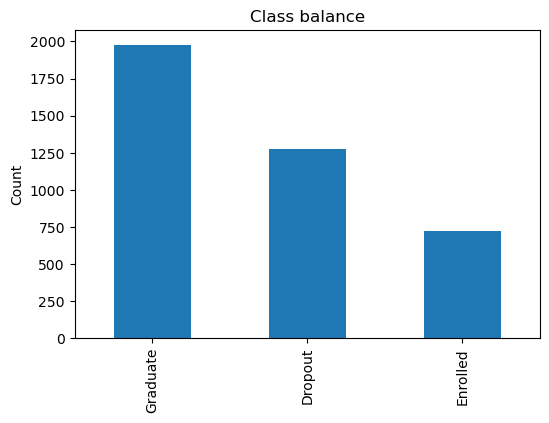

In [12]:
# target distribution
plt.figure(figsize=(6,4))
df['Target'].value_counts().plot(kind='bar')
plt.ylabel("Count")
plt.title("Class balance")
plt.show()

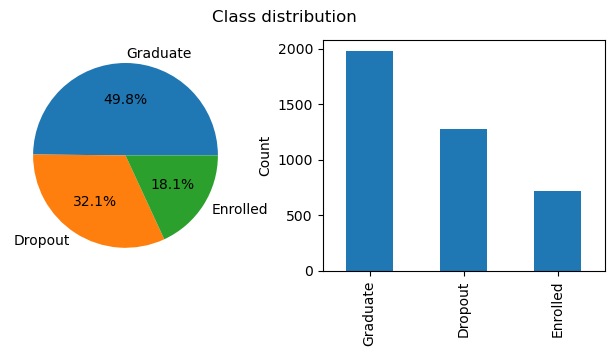

In [48]:
fig, ax = plt.subplots(1,2, figsize=(8,3))
df['Target'].value_counts().plot(kind="pie", autopct='%1.1f%%', ax=ax[0], ylabel='')
df['Target'].value_counts().plot(kind="bar", ax=ax[1])
ax[1].set_ylabel("Count")
fig.suptitle("Class distribution")
plt.show()


c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


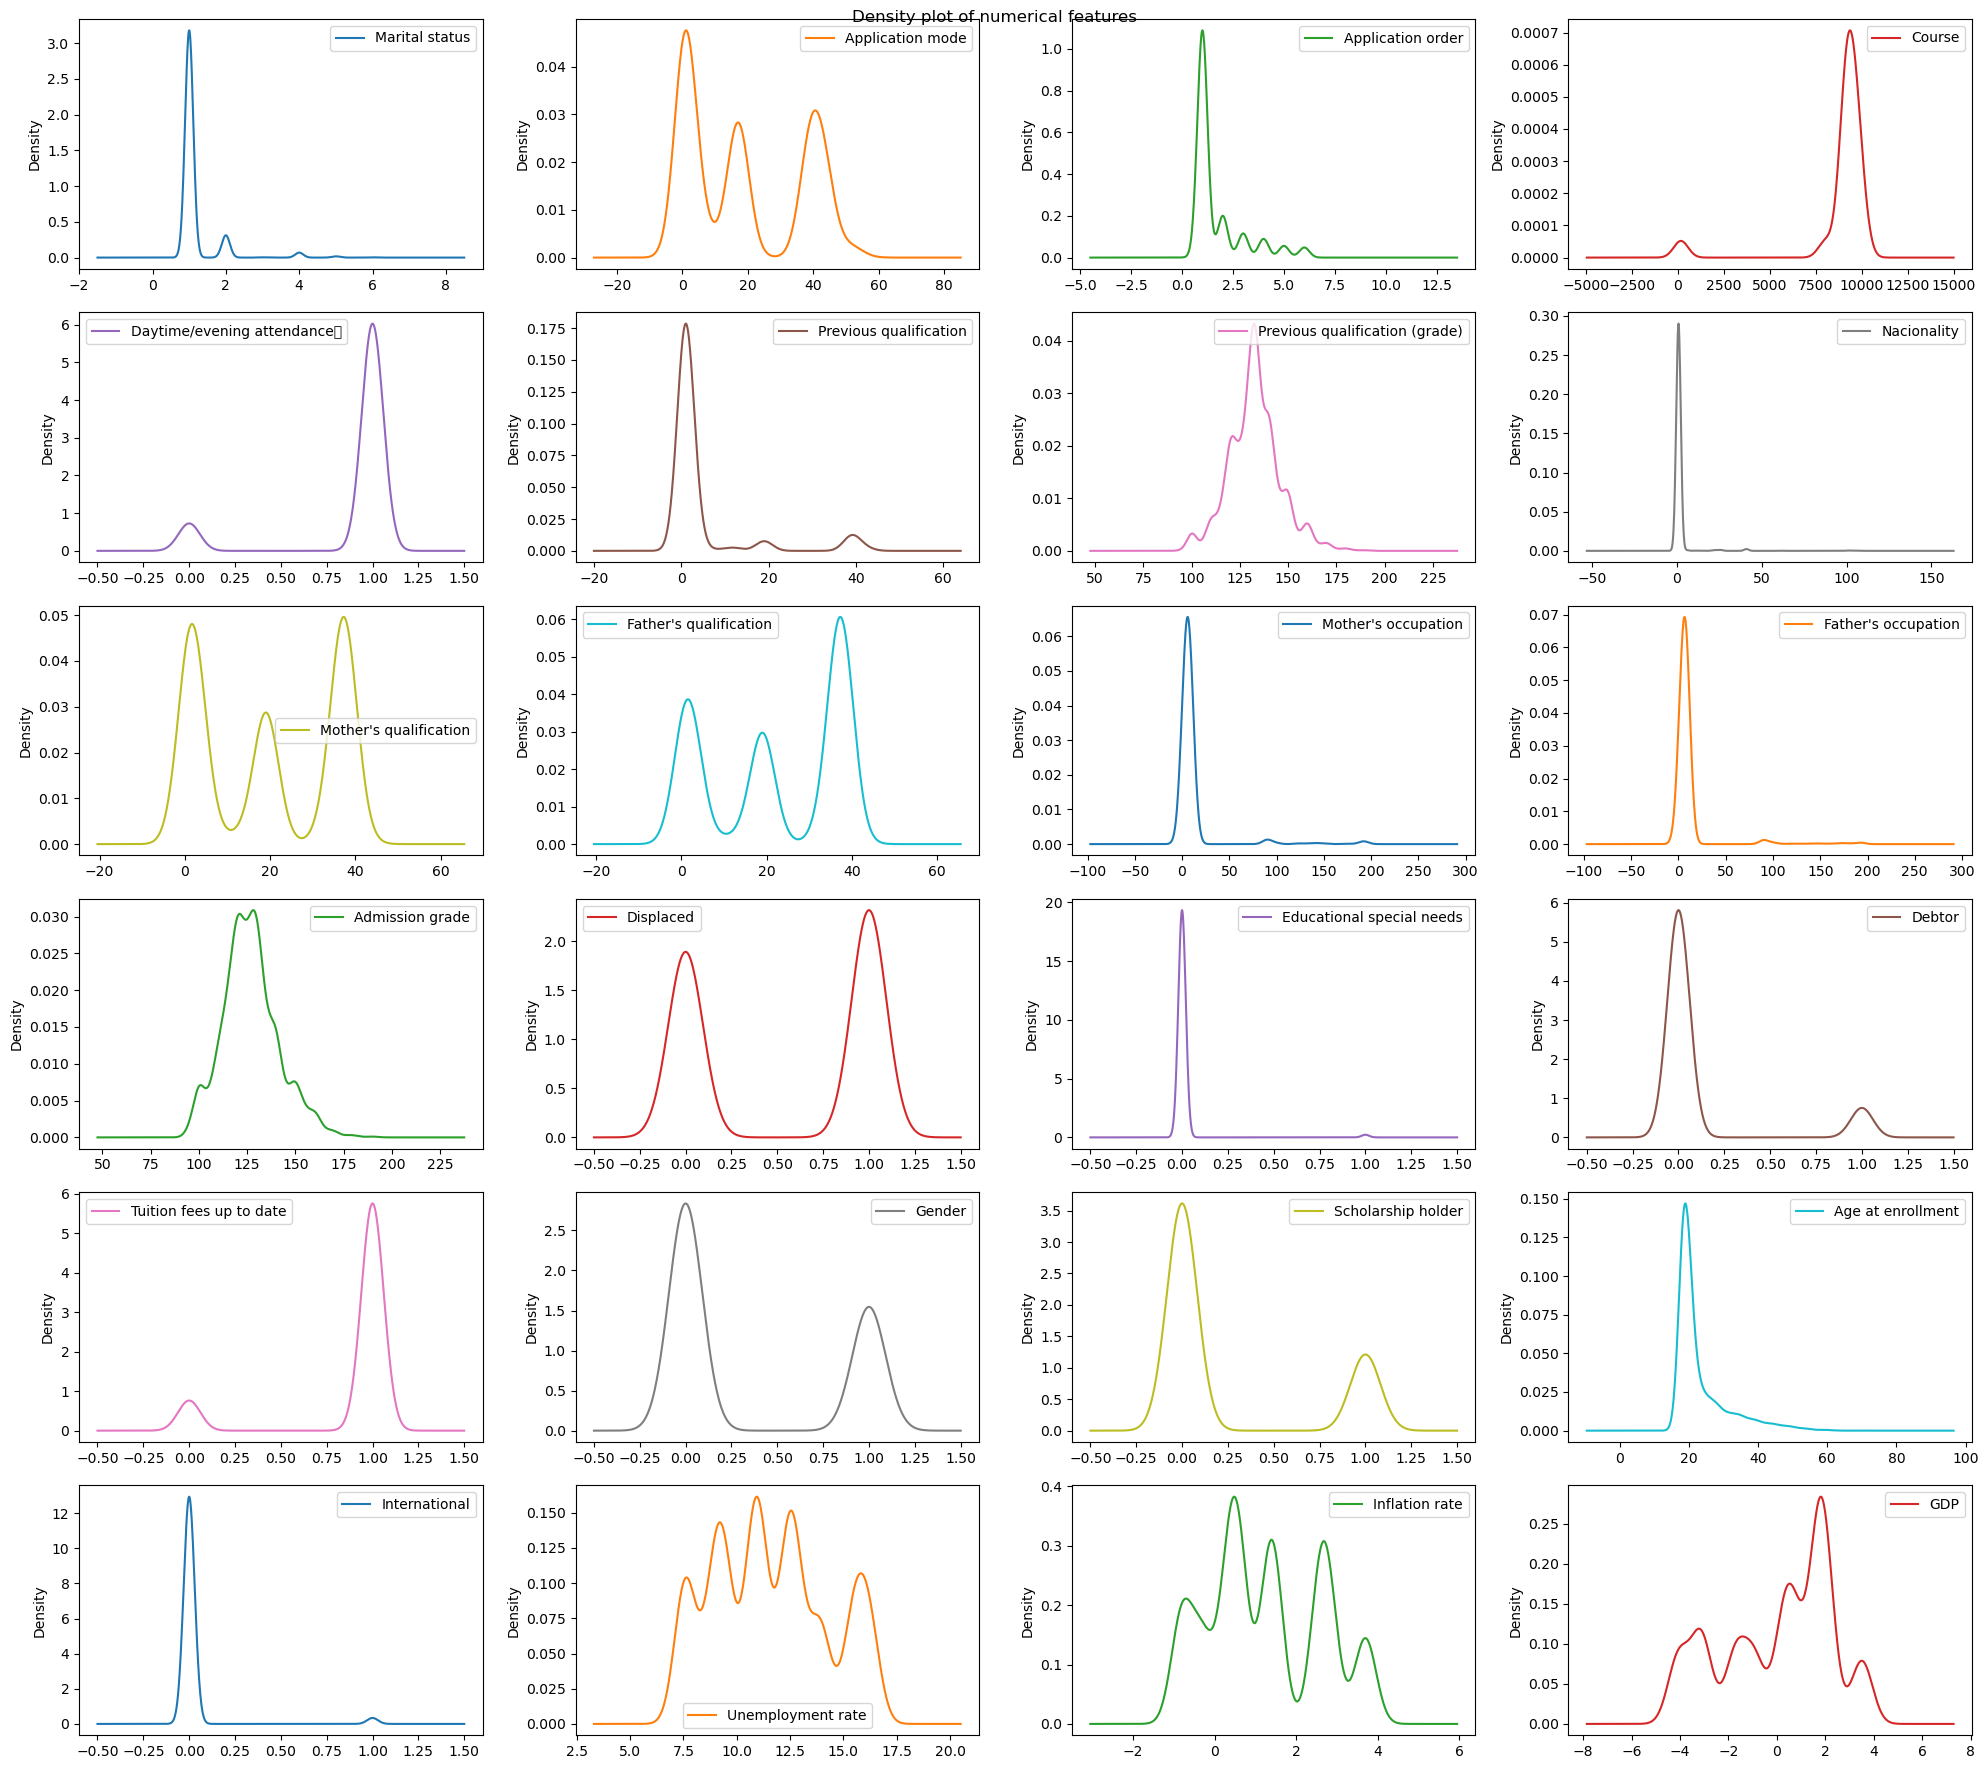

In [52]:

numerical_data = df.select_dtypes(include=[np.number])

n_feats = numerical_data.shape[1]
n_cols  = 4                                     # 2 columns looks clean
n_rows  = int(np.ceil(n_feats / n_cols))

numerical_data.plot(
    kind="density",
    figsize=(20, 3 * n_rows),                  # height adapts to row count
    subplots=True,
    layout=(n_rows, n_cols),
    sharex=False,
    title="Density plot of numerical features"
)

plt.tight_layout()
plt.show()


# Preprocessing Starts Here

In [13]:
# a) Drop rows that have no label
df = df.dropna(subset=['Target']).reset_index(drop=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3971 entries, 0 to 3970
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Marital status                  3604 non-null   float64
 1   Application mode                3551 non-null   float64
 2   Application order               3588 non-null   float64
 3   Course                          3541 non-null   float64
 4   Daytime/evening attendance	     3575 non-null   float64
 5   Previous qualification          3585 non-null   float64
 6   Previous qualification (grade)  3548 non-null   float64
 7   Nacionality                     3564 non-null   float64
 8   Mother's qualification          3598 non-null   float64
 9   Father's qualification          3574 non-null   float64
 10  Mother's occupation             3578 non-null   float64
 11  Father's occupation             3582 non-null   float64
 12  Admission grade                 35

In [15]:
# b) Split features vs. label
X = df.drop('Target', axis=1)
y = df['Target']

In [19]:
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP
0,1.0,17.0,5.0,171.0,1.0,1.0,122.0,1.0,19.0,12.0,...,0.0,0.0,1.0,1.0,0.0,NaN,0.0,10.8,1.4,1.74
1,1.0,15.0,1.0,9254.0,1.0,1.0,160.0,1.0,1.0,3.0,...,0.0,0.0,0.0,1.0,0.0,19.0,0.0,13.9,-0.3,0.79
2,1.0,NaN,5.0,9070.0,1.0,1.0,122.0,NaN,37.0,37.0,...,0.0,0.0,0.0,1.0,NaN,19.0,0.0,10.8,1.4,1.74
3,1.0,17.0,2.0,9773.0,1.0,1.0,122.0,1.0,38.0,37.0,...,NaN,0.0,1.0,NaN,0.0,20.0,0.0,9.4,-0.8,-3.12
4,2.0,39.0,1.0,8014.0,0.0,1.0,100.0,1.0,37.0,NaN,...,0.0,0.0,1.0,0.0,0.0,NaN,0.0,13.9,-0.3,0.79


In [20]:
y.head()

0     Dropout
1    Graduate
2     Dropout
3    Graduate
4    Graduate
Name: Target, dtype: object

In [21]:
# label the target column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_enc = le.fit_transform(y)

In [25]:
y_enc[:50]

array([0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 2, 2,
       1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       2, 1, 1, 2, 0, 2])

In [26]:
# d) Build transformers for numeric features
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),   # fix NaNs in features
    ('scaler',  StandardScaler())                    # z‑score scale
])

In [27]:
X_clean = numeric_pipeline.fit_transform(X)

In [28]:
X_clean[:10]

array([[-0.28241266, -0.08237831,  2.63388114, -4.50235212,  0.32860297,
        -0.33043918, -0.85199698, -0.11562421, -0.03387151, -0.67815934,
        -0.21092167, -0.06341611,  0.0376502 ,  0.82061513, -0.10462814,
        -0.33977851,  0.34482856,  1.466829  , -0.54057616, -0.40024889,
        -0.15570983, -0.28602783,  0.1191201 ,  0.77685556],
       [-0.28241266, -0.20351302, -0.52288095,  0.18073433,  0.32860297,
        -0.33043918,  2.17377957, -0.11562421, -1.24440553, -1.29479175,
        -0.29078913, -0.31519953,  1.1482089 ,  0.82061513, -0.10462814,
        -0.33977851, -2.89999183,  1.466829  , -0.54057616, -0.53672393,
        -0.15570983,  0.94059861, -1.17413187,  0.33652465],
       [-0.28241266, -0.08237831,  2.63388114,  0.08586612,  0.32860297,
        -0.33043918, -0.85199698, -0.11562421,  1.1766625 ,  1.03470845,
        -0.21092167, -0.06341611, -0.14500747,  0.82061513, -0.10462814,
        -0.33977851, -2.89999183,  1.466829  , -0.54057616, -0.53672393,
  

# Model Training Starts from Here

In [29]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(
    X_clean, y_enc, test_size=0.30, stratify=y_enc, random_state=42)

KNN accuracy: 0.5604026845637584
              precision    recall  f1-score   support

     Dropout       0.54      0.55      0.55       382
    Enrolled       0.27      0.19      0.22       216
    Graduate       0.65      0.70      0.67       594

    accuracy                           0.56      1192
   macro avg       0.48      0.48      0.48      1192
weighted avg       0.54      0.56      0.55      1192



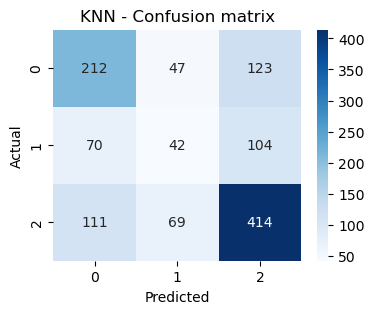

In [30]:
# K‑NN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_tr, y_tr)
knn_pred = knn.predict(X_te)

print("KNN accuracy:", accuracy_score(y_te, knn_pred))
print(classification_report(y_te, knn_pred, target_names=le.classes_))

cm = confusion_matrix(y_te, knn_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("KNN - Confusion matrix")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()


NB accuracy: 0.5612416107382551
              precision    recall  f1-score   support

     Dropout       0.59      0.46      0.52       382
    Enrolled       0.19      0.07      0.10       216
    Graduate       0.59      0.80      0.68       594

    accuracy                           0.56      1192
   macro avg       0.45      0.45      0.43      1192
weighted avg       0.52      0.56      0.52      1192



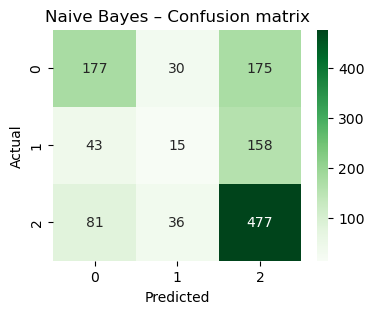

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_tr, y_tr)
nb_pred = nb.predict(X_te)

print("NB accuracy:", accuracy_score(y_te, nb_pred))
print(classification_report(y_te, nb_pred, target_names=le.classes_))

cm = confusion_matrix(y_te, nb_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens")
plt.title("Naive Bayes – Confusion matrix")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()


Random Forest accuracy: 0.6157718120805369
              precision    recall  f1-score   support

     Dropout       0.63      0.56      0.59       382
    Enrolled       0.23      0.05      0.08       216
    Graduate       0.63      0.86      0.73       594

    accuracy                           0.62      1192
   macro avg       0.50      0.49      0.47      1192
weighted avg       0.56      0.62      0.57      1192



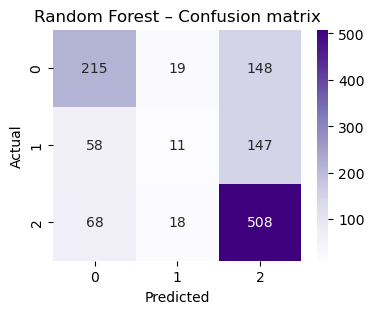

In [32]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_tr, y_tr)
rf_pred = rf.predict(X_te)

print("Random Forest accuracy:", accuracy_score(y_te, rf_pred))
print(classification_report(y_te, rf_pred, target_names=le.classes_))

cm = confusion_matrix(y_te, rf_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap="Purples")
plt.title("Random Forest – Confusion matrix")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()


Gradient Boost accuracy: 0.6241610738255033
              precision    recall  f1-score   support

     Dropout       0.62      0.57      0.60       382
    Enrolled       0.34      0.09      0.15       216
    Graduate       0.65      0.85      0.73       594

    accuracy                           0.62      1192
   macro avg       0.54      0.51      0.49      1192
weighted avg       0.58      0.62      0.58      1192



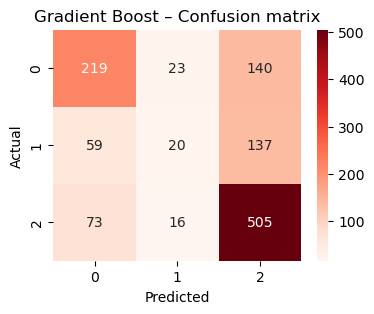

In [33]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(X_tr, y_tr)
gb_pred = gb.predict(X_te)

print("Gradient Boost accuracy:", accuracy_score(y_te, gb_pred))
print(classification_report(y_te, gb_pred, target_names=le.classes_))

cm = confusion_matrix(y_te, gb_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap="Reds")
plt.title("Gradient Boost – Confusion matrix")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()


# Neural Network

MLP accuracy: 0.6073825503355704
              precision    recall  f1-score   support

     Dropout       0.61      0.52      0.56       382
    Enrolled       0.25      0.07      0.11       216
    Graduate       0.64      0.86      0.73       594

    accuracy                           0.61      1192
   macro avg       0.50      0.48      0.47      1192
weighted avg       0.56      0.61      0.56      1192



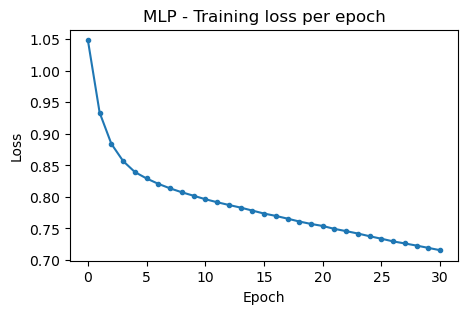

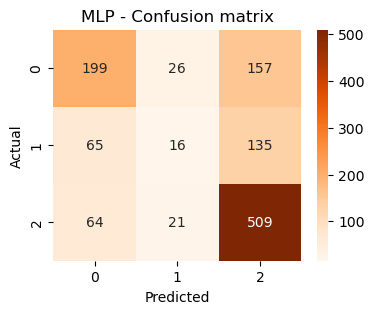

In [34]:
# Neural net with early stopping + training curve
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, 32),
                    activation="relu",
                    solver="adam",
                    early_stopping=True,      # built‑in patience
                    n_iter_no_change=10,
                    max_iter=500,
                    random_state=42)

mlp.fit(X_tr, y_tr)
mlp_pred = mlp.predict(X_te)

print("MLP accuracy:", accuracy_score(y_te, mlp_pred))
print(classification_report(y_te, mlp_pred, target_names=le.classes_))

# training loss curve
plt.figure(figsize=(5,3))
plt.plot(mlp.loss_curve_, marker='.')
plt.title("MLP - Training loss per epoch")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.show()

# confusion matrix
cm = confusion_matrix(y_te, mlp_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges")
plt.title("MLP - Confusion matrix")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()
